# import all required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Data preprocessing

read the dataset

In [3]:
df = pd.read_csv("BRCA.csv")

examine the dataset

In [4]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
df.shape # find the rows and columns of the dataset

(341, 16)

In [6]:
df.describe()     # let's see some properties of the dataset

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


see the attributes of our dataset

In [7]:
print("The attributes of the dataset are:\n")
for column in df.columns:
    print("---",column)

The attributes of the dataset are:

--- Patient_ID
--- Age
--- Gender
--- Protein1
--- Protein2
--- Protein3
--- Protein4
--- Tumour_Stage
--- Histology
--- ER status
--- PR status
--- HER2 status
--- Surgery_type
--- Date_of_Surgery
--- Date_of_Last_Visit
--- Patient_Status


find the number of male and female patient in dataset

In [51]:
gender = df.groupby("Gender",as_index = False)['Age'].count()
gender["Percentage"] = (gender["Age"]/gender["Age"].sum()) * 100
gender

,Gender,Age,Percentage
0,FEMALE,330,98.802395
1,MALE,4,1.197605


Let's show it by graphs

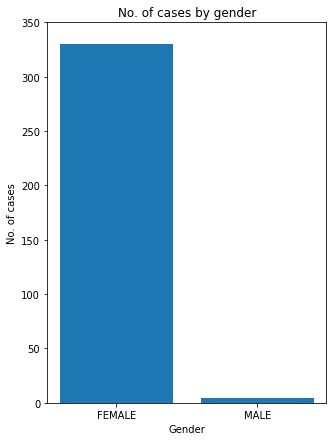

In [59]:
plt.figure(figsize=(5,7))
gender_bar = plt.bar(gender['Gender'],gender["Age"])
plt.yticks(np.arange(0,400,50))
plt.xlabel('Gender')
plt.ylabel('No. of cases')
plt.title('No. of cases by gender')
plt.show()

showing of the ages range

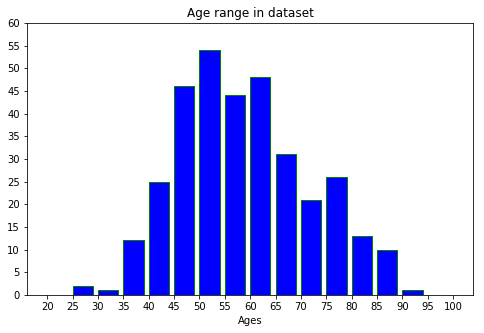

In [9]:
bins = list(range(20,105,5))
plt.figure(figsize=(8,5))
plt.hist(df['Age'],width=4, align = 'mid', bins = bins, color='blue',edgecolor='green')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Age range in dataset')
plt.yticks(np.arange(0,65,5))
plt.show()

find number of cases by cancer type and draw the shape

In [4]:
cancer_types_total = df.groupby("Histology",as_index = False)["Age"].count()
cancer_types_total.rename(columns={"Age":"Total_Number"}, inplace=True)
totals_of_dataset=[]
for his, num in zip(cancer_types_total["Histology"],cancer_types_total["Total_Number"]):
    answer=(num/df.shape[0]) * 100
    totals_of_dataset.append(answer)
cancer_types_total["Percentage"] = totals_of_dataset
cancer_types_total

,Histology,Total_Number,Percentage
0,Infiltrating Ductal Carcinoma,233,68.328446
1,Infiltrating Lobular Carcinoma,89,26.099707
2,Mucinous Carcinoma,12,3.519062


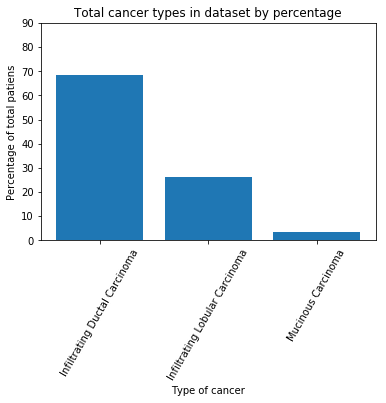

In [5]:
totals_bar = plt.bar(cancer_types_total['Histology'],cancer_types_total['Percentage'])
plt.xticks(rotation = 60)
plt.yticks(np.arange(0,100,10))
plt.xlabel('Type of cancer')
plt.ylabel('Percentage of total patiens')
plt.title('Total cancer types in dataset by percentage')
plt.show()

Stages of each cancer type

In [48]:
cancerTypeByStage = df.groupby(["Histology","Tumour_Stage"], as_index = False)['Age'].count()
cancerTypeByStage 

,Histology,Tumour_Stage,Age
0,Infiltrating Ductal Carcinoma,I,50
1,Infiltrating Ductal Carcinoma,II,124
2,Infiltrating Ductal Carcinoma,III,59
3,Infiltrating Lobular Carcinoma,I,11
4,Infiltrating Lobular Carcinoma,II,56
5,Infiltrating Lobular Carcinoma,III,22
6,Mucinous Carcinoma,I,3
7,Mucinous Carcinoma,II,9


Age ranges for each cancer type

In [11]:
member = df[['Histology','Age','Gender']].groupby(['Age']).count().sum()
member

Histology    334
Gender       334
dtype: int64

find the patient status how many of them are alive and how many are dead.

In [10]:
df['Patient_Status'].value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

Checking ER/PR/HER2 status

In [25]:
n_markers = df[['Histology','ER status','PR status','HER2 status']]

for ER status

In [28]:
n_markers.loc[n_markers["ER status"] == 'Positive'].count()

Histology      334
ER status      334
PR status      334
HER2 status    334
dtype: int64

for PR status

In [18]:
n_markers.loc[n_markers['PR status']=='Positive'].count()

Histology      334
ER status      334
PR status      334
HER2 status    334
dtype: int64

for HER2 status

In [29]:
n_markers.loc[n_markers['HER2 status'] == "Negative"].count()

Histology      305
ER status      305
PR status      305
HER2 status    305
dtype: int64

In [30]:
n_markers.loc[n_markers['HER2 status'] == "Positve"].count()

Histology      0
ER status      0
PR status      0
HER2 status    0
dtype: int64

find how many people have cancer and how many don't

In [38]:
cancer_types_total = df.groupby("HER2 status",as_index = False)["Age"].count()
cancer_types_total.rename(columns={"Age":"Total"}, inplace=True)
totals_of_dataset=[]
for his, num in zip(cancer_types_total['HER2 status'],cancer_types_total["Total"]):
    answer=(num/df.shape[0]) * 100
    totals_of_dataset.append(answer)
cancer_types_total["Percentage"] = totals_of_dataset
cancer_types_total

,HER2 status,Total,Percentage
0,Negative,305,89.442815
1,Positive,29,8.504399


find the age range for those who have.

In [12]:
cancerAge = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = df.loc[(df["Age"] >= bins[i]) & (df["Age"] < bins[i+1])][['Histology','Age']]
        if row.empty is False:
            cancerAge.update({'{} to {}'.format(bins[i],bins[i+1]):row})
            key+=1
        else:
            pass
cancerAgeList = []
for key, val in cancerAge.items():
    age_range = key
    hist = val.groupby('Histology',as_index = False).count()['Histology']
    age_count = val.groupby("Histology", as_index = False).count()['Age']
    hist_vals = {}
    for h ,a in zip(hist,age_count):
        hist_vals.update({'Age_range':age_range,h:a})
        cancerAgeList.append(hist_vals)
cancerAge = pd.DataFrame(cancerAgeList)
cancerAge.fillna(0, inplace = True)
cols = ['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma']
for val in cols:
    cancerAge[val] = cancerAge[val]
cancerAge.head()

,Age_range,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
0,25 to 30,1,1.0,0.0
1,25 to 30,1,1.0,0.0
2,30 to 35,1,0.0,0.0
3,35 to 40,7,4.0,1.0
4,35 to 40,7,4.0,1.0


1. find null values

In [13]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

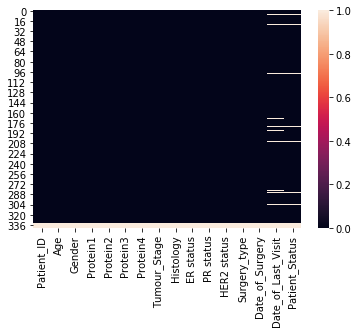

In [6]:
def nullcontrol(df):
    sbn.heatmap(df.isnull())
nullcontrol(df)

2. Drop null values

In [14]:
df=df.loc[:333]
df = df.dropna()
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

know our dataset is clean

In [15]:
def object_uniques(data=df):
    data = data.select_dtypes(include=["object"])
    for i in data.columns:
        if(data[i].unique().shape[0]<5):
            print("{0}: ".format(i),data[i].unique())
object_uniques(df)

Gender:  ['FEMALE' 'MALE']
Tumour_Stage:  ['III' 'II' 'I']
Histology:  ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
ER status:  ['Positive']
PR status:  ['Positive']
HER2 status:  ['Negative' 'Positive']
Surgery_type:  ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Patient_Status:  ['Alive' 'Dead']


# Graphs

show proteins in shapes

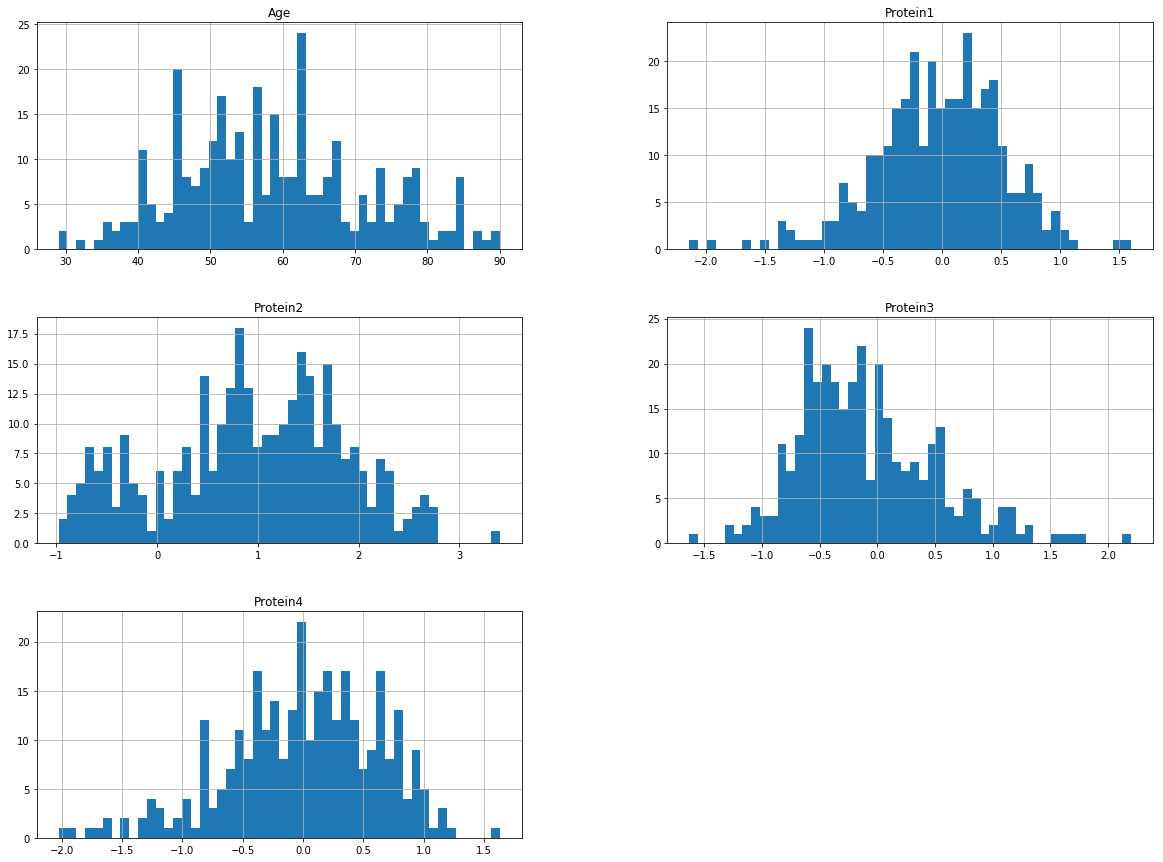

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

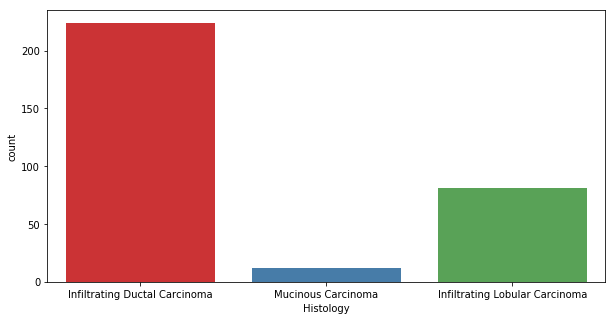

In [17]:
plt.figure(figsize=(10,5));
sbn.countplot(df["Histology"])

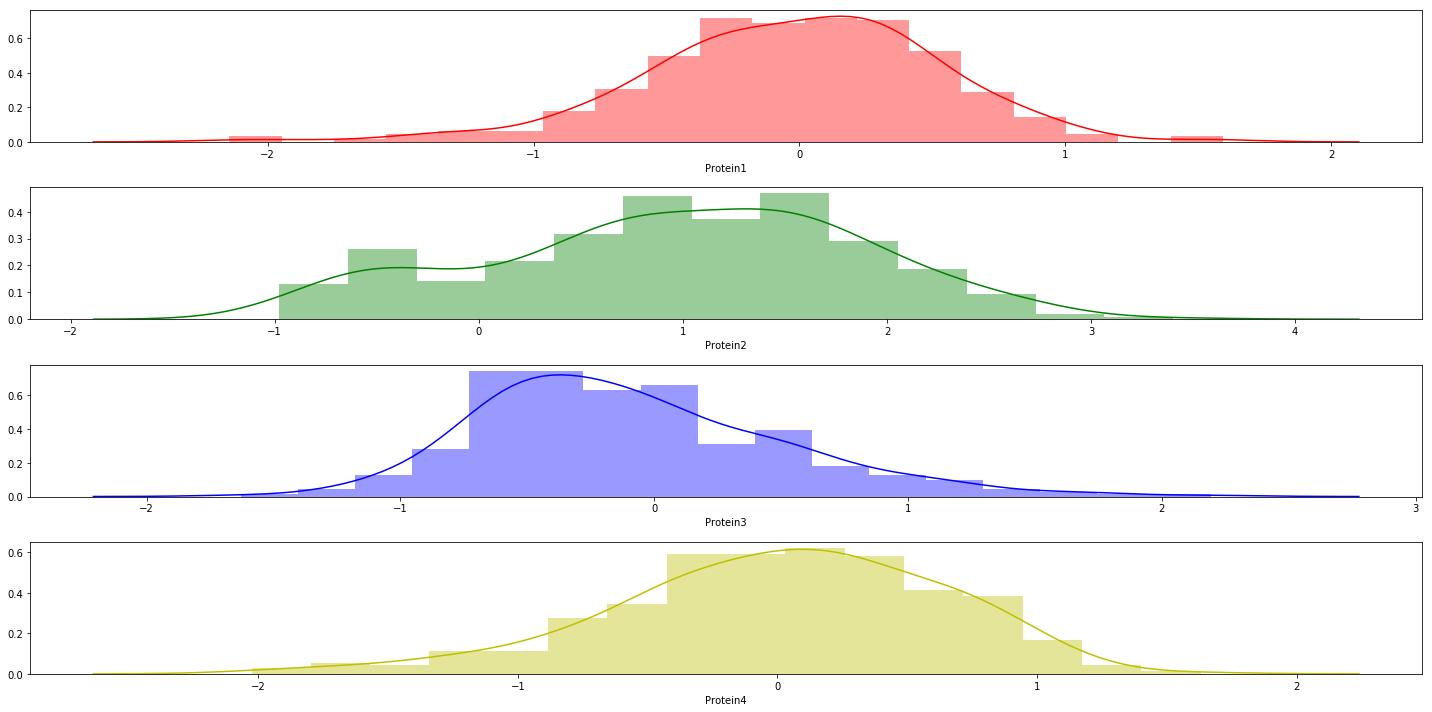

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
sbn.distplot(df["Protein1"],color="r")

plt.subplot(4,1,2)
sbn.distplot(df["Protein2"],color="g")

plt.subplot(4,1,3)
sbn.distplot(df["Protein3"],color="b")

plt.subplot(4,1,4)
sbn.distplot(df["Protein4"],color="y")

plt.tight_layout()


Detailed Exploration of Data

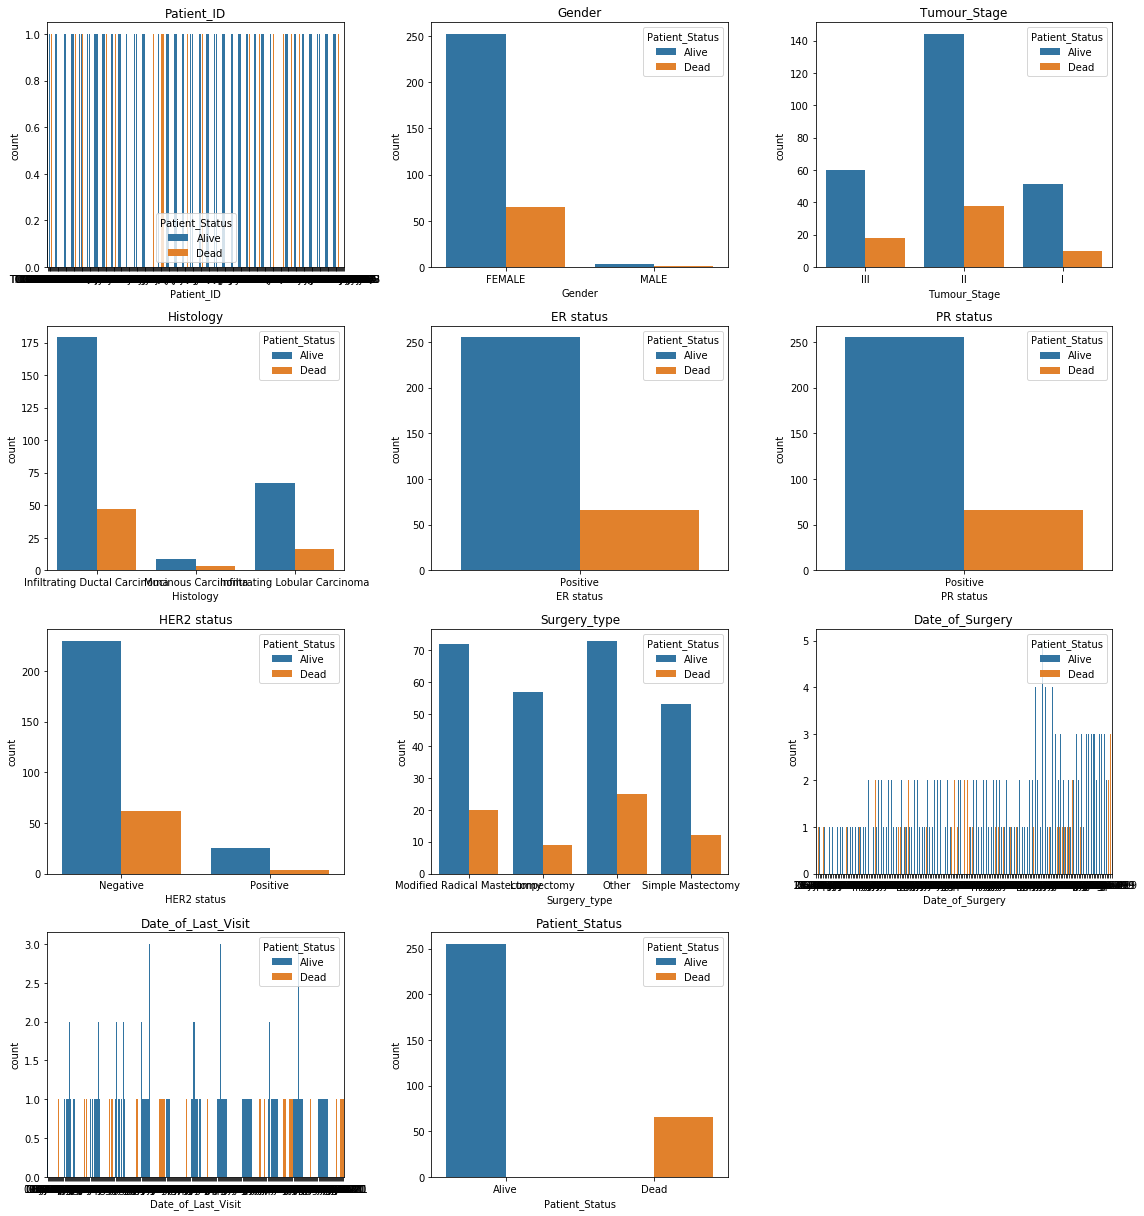

In [68]:
cat_feat = df.select_dtypes(include="object").columns.tolist()
plt.figure(figsize=(16,17))
for i, feat in enumerate(cat_feat):
    plt.subplot(4,3,i+1)
    sbn.countplot(x=feat, data=df,hue = "Patient_Status")
    plt.tight_layout()
    plt.title(feat)

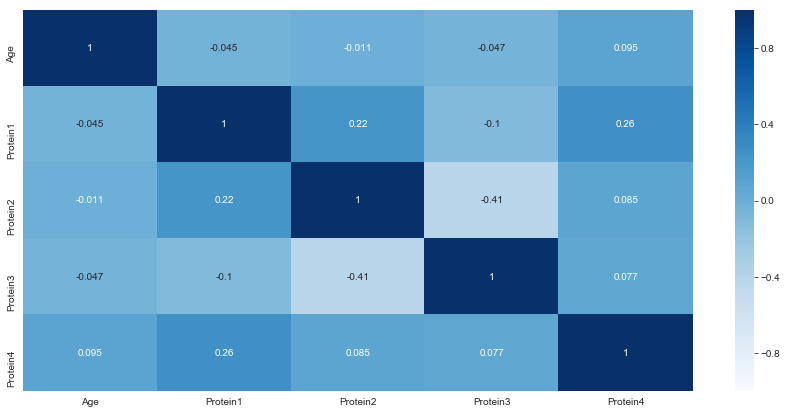

In [52]:
sbn.set_palette(sbn.color_palette("Set1",8))
plt.figure(figsize=(15,7))
sbn.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap=plt.cm.Blues)
plt.show()